# Data Analysis

## ✔ Mission Objectives
After you complete this notebook you will be able to:
1. Understand the value of containers for Jupyter Notebooks
2. Perform simple data analysis using common python packages
3. Create data visualizations using common python packages

## 📦 Containers for Jupyter Notebooks

If you were to run a Jupyter Notebook on your local machine then you would also have to install any packages that you might need. This not only takes time, it also takes disk space on your local machine. If you do a lot of work, or need to install several versions of software in different environments for different projects, then it can really add up.

Luckily, with the <a href="https://sdsu-research-ci.github.io/instructionalcluster/images" target="_blank">available container images</a>, we have container images that should have what you need for most data science and machine learning workflows. If you do find that you need to install software in addition to what is already provided, please reach out to Research and Cyberinfrastructure and we can discuss creating a customized image as part of our <a href="https://it.sdsu.edu/research/services/software-factory" target="_blank">Software Factory</a>. Let's see containers in action in the context of Jupyter Notebooks with some simple data analysis.

## 👩‍🔬👨‍🔬 Data Analysis with Python

If you've been following along, then you started your notebook with the Stack Datascience image.

We can check the python packages that were installed via this container image with `!pip list`:

In [1]:
!pip list

Package                       Version
----------------------------- -----------
aiofiles                      22.1.0
aiosqlite                     0.18.0
alembic                       1.10.2
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
async-generator               1.10
attrs                         22.2.0
Babel                         2.12.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.0
bleach                        6.0.0
blinker                       1.5
bokeh                         3.1.0
Bottleneck                    1.3.7
brotlipy                      0.7.0
cached-property               1.5.2
certifi                       2022.12.7
certipy                       0.1.3
cffi                          1.15.1
charset-normalizer            2.1.1
click                         8.1.3
cloudpickl

As you may note, that is quite a few python packages that are ready to go.

Now, let's start analyzing some data using <a href="https://pandas.pydata.org/" target="_blank">Pandas</a>, which is a popular data analysis tool. Pandas is especially suited to working with tabular data (rows and columns) with it's <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame" target="_blank">DataFrame</a>
 object.

Let's begin by importing pandas:

In [2]:
import pandas as pd

*Note*: If you were to run this notebook locally, then you would first need to ensure that pandas was installed with `!pip show pandas`. If it is not installed, you'd need to run `!pip install pandas`.

Since we are using the Stack Datascience container image we can safely skip these steps.

We will be using the provided laptops dataset which is available at `./data/laptops.csv`. 

Let's use Pandas to load the data from the csv file into a Pandas DataFrame object using Pandas' [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas-read-csv) method:

In [3]:
laptops = pd.read_csv('./data/laptops.csv', encoding='ISO-8859-1', index_col=0)

We can quickly get an idea of the data that we're dealing with by using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=dataframe%20head#pandas.DataFrame.head" target="_blank">DataFrame.head()</a> method to print out the first few rows of the data:

In [4]:
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


To get the total number of rows and columns we have in our dataset we can access the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html" target="_blank">DataFrame.shape</a> property: 

In [5]:
laptops.shape

(1303, 12)

We can interact with each of the columns of the dataset. Each column in the pandas DataFrame is a <a href="https://pandas.pydata.org/docs/reference/series.html" target="_blank">Series</a> object.

For instance, if we wanted to see all of the unique companies in the dataset, we could use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html" target="_blank">Series.unique</a> method:

In [6]:
laptops['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

We can find the price of the most expensive laptop using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html" target="_blank">Series.max()</a> method on the Price_euros column:

In [7]:
laptops['Price_euros'].max()

6099.0

If we want to see what the most expensive laptop across all companies in the dataset is, we can use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html" target="_blank">DataFrame.loc[]</a> property to search by a specific column.

The 'loc[]' property can apply a boolean expression for each element of a column, creating a Boolean mask that selects rows from that column.

Below, we are using the "Price_euros" column to find the row in the DataFrame with the maximum price (in euros).

In [17]:
laptops.loc[laptops['Price_euros'] == laptops['Price_euros'].max()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
200,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0


Now that we've found the most expensive laptop in the dataset, let's find the most expensive laptop made by each company. We can use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html" target="_blank">DataFrame.groupby</a> method and then calculate the max Price_euros:

In [21]:
price_by_company = laptops.groupby(['Company'])['Price_euros'].max()
price_by_company

Company
Acer         2599.00
Apple        2858.00
Asus         3975.00
Chuwi         449.00
Dell         3659.40
Fujitsu       799.00
Google       2199.00
HP           4389.00
Huawei       1499.00
LG           2299.00
Lenovo       4899.00
MSI          2799.00
Mediacom      389.00
Microsoft    2589.00
Razer        6099.00
Samsung      1849.00
Toshiba      2799.00
Vero          260.00
Xiaomi       1399.95
Name: Price_euros, dtype: float64

## 📊 Data Visualizations

Let's make that data easier to digest with a visualization.

To do this, we will use <a href="https://matplotlib.org/" target="_blank">Matplotlib</a> which is a versatile Python package for generating diagrams and visualizations.

First we need to import matplotlib, and specifically we want the <a href="https://matplotlib.org/stable/api/pyplot_summary.html" target="_blank">matplotlib.pyplot</a> object:

In [22]:
import matplotlib.pyplot as plt

Now, let's generate a barchart that visualizes our variable `price_by_company` that we computed earlier:

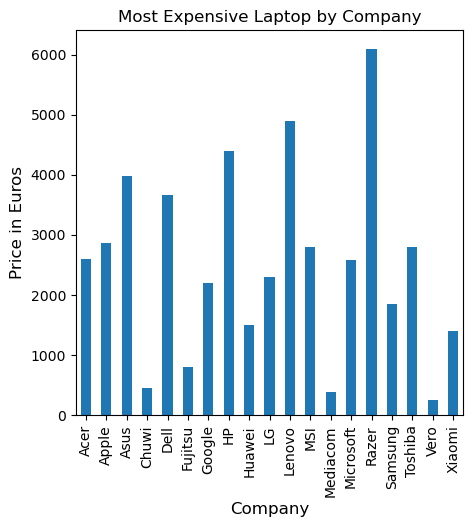

In [23]:
# Specify how large the matplotlib.pyplot.figure should be width, height -- in inches
plt.figure(figsize=(5,5))

# DataFrame and Series objects both have a plot method that will use matplotlib by default
# We specify the plot method's kind paramater to be 'bar', so that it renders a barchart
price_by_company.plot(kind='bar')

# Set the figure title, x and y axes with their respective font sizes
plt.title('Most Expensive Laptop by Company', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price in Euros', fontsize=12)

# Show the figure
plt.show()

## 🚀 Next Destination: Git Source Control Management
Now that we've done some data analysis, let's explore our next topic: [Git Source Control Management](./git.ipynb).